In [20]:
def grid_making(grid):
    fig, ax = plt.subplots(figsize = (10,10))
    color = col.ListedColormap(['0.5','white'])

    ax.imshow(grid, cmap = color, origin = 'lower')
    major_ticks = np.arange(0,11,1)

    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)

    ax.grid(which = 'major', axis = 'both')



Grid of empty locations and obstacles: 
 [[ 0.  0.  0.  0.  0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0. -1.  0.]
 [ 0.  0. -1.  0. -1.  0.  0.  0. -1.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1. -1. -1.  0.  0.  0.]]
number of nodes in total: 
 100
number of nodes w/o obstacles: 
 82
[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 9), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 7), (1, 9), (2, 0), (2, 1), (2, 3), (2, 5), (2, 6), (2, 7), (2, 9), (3, 0), (3, 1), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 0), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 0), (5, 1), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 6), (6, 8), (6,

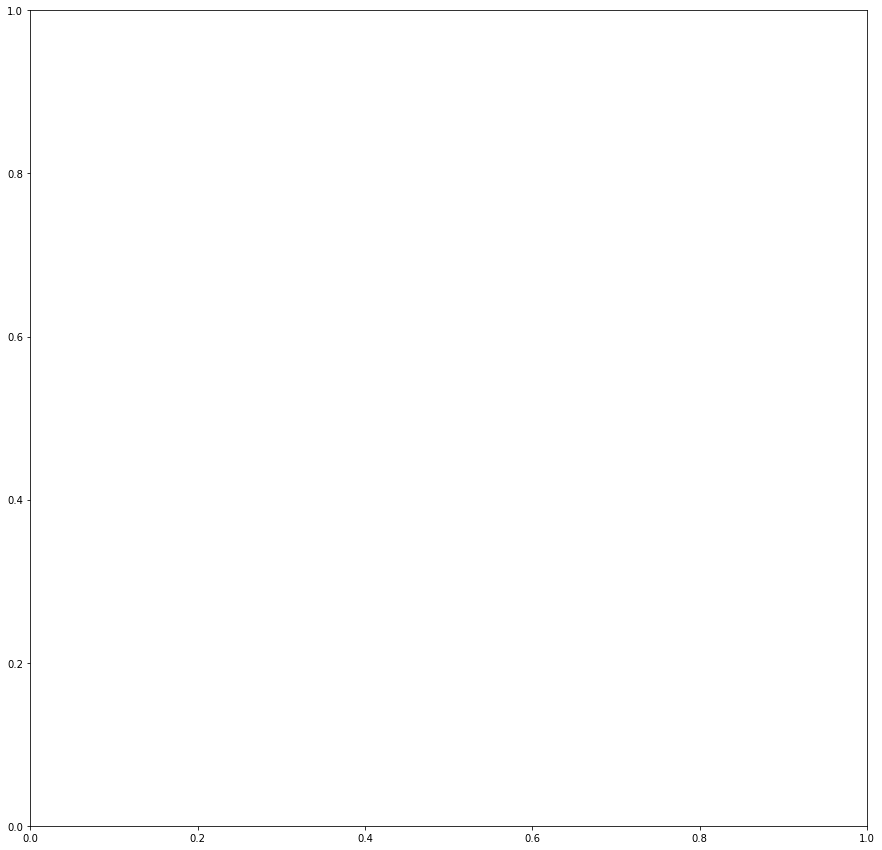

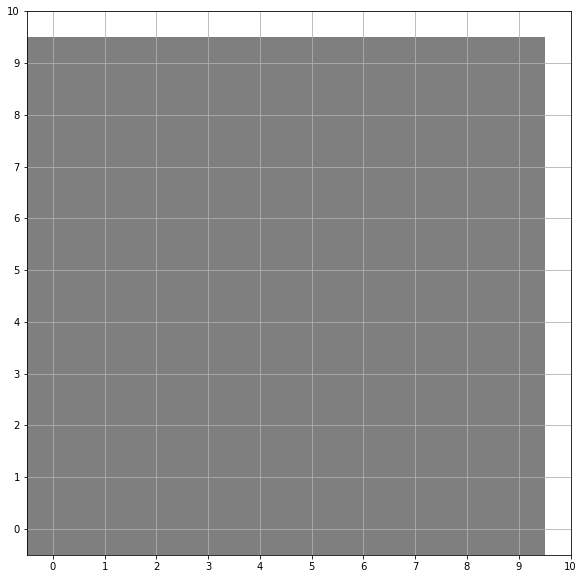

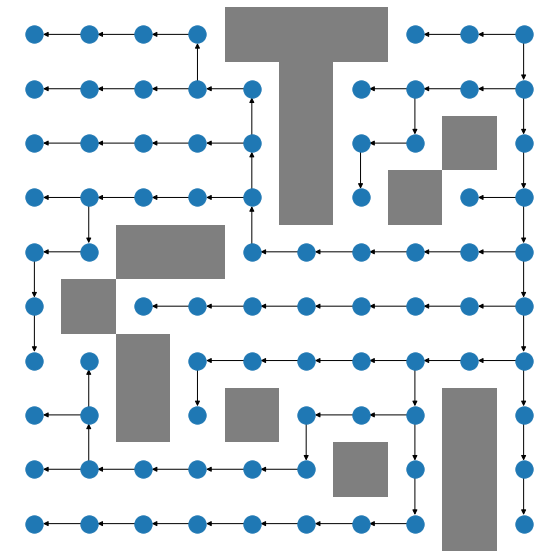

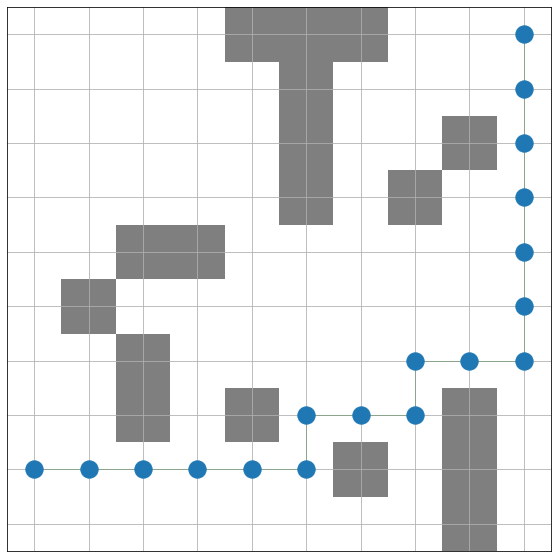

In [25]:
import matplotlib.pyplot as plt
import matplotlib.colors as col
import numpy as np
import networkx as nx

fig, ax = plt.subplots(figsize = (15,15))

# creating goal
goal = plt.Rectangle((1., 0.), width = 1, height = 1, color = 'g')

#creating robot initial position
r_pos = plt.Rectangle((9, 9), width = 1, height = 1, color = 'b')

#creating obstacles
    #rectangle
obs11 = plt.Rectangle((4, 1), width = 1, height = 1, color = 'r')
obs12 = plt.Rectangle((3, 2), width = 1, height = 1, color = 'r')
obs13 = plt.Rectangle((5, 2), width = 1, height = 1, color = 'r')

obs21 = plt.Rectangle((6, 5.), width = 1, height = 1, color = 'r')
obs22 = plt.Rectangle((7., 5.), width = 1, height = 1, color = 'r')
obs23 = plt.Rectangle((8, 5.), width = 1, height = 1, color = 'r')

obs31 = plt.Rectangle((2., 8.), width = 1, height = 1, color = 'r')
obs32 = plt.Rectangle((1., 8.), width = 1, height = 1, color = 'r')
obs33 = plt.Rectangle((0., 8.), width = 1, height = 1, color = 'r')

obs41 = plt.Rectangle((9.,6.), width = 1, height = 1, color = 'r')
obs42 = plt.Rectangle((9.,5.), width = 1, height = 1, color = 'r')
obs43 = plt.Rectangle((9.,4.), width = 1, height = 1, color = 'r')


    #circle
obs6 = plt.Rectangle((2., 2.), width = 1, height = 1, color = 'r')
obs7 = plt.Rectangle((6., 7.), width = 1, height = 1, color = 'r')
obs8 = plt.Rectangle((7., 8.), width = 1, height = 1, color = 'r') 
obs9 = plt.Rectangle((2., 4.), width = 1, height = 1, color = 'r')
obs10 = plt.Rectangle((4., 2.), width = 1, height = 1, color = 'r')
obs_11 = plt.Rectangle((3., 5.), width = 1, height = 1, color = 'r')
obs_12 = plt.Rectangle((1., 6.), width = 1, height = 1, color = 'r')
obs_13 = plt.Rectangle((5., 3.), width = 1, height = 1, color = 'r')

obs_arr = [(4, 1),
          (3, 2),
          (5, 2),
          (6, 5.),
          (7., 5.),
          (8, 5.),
          (2., 8.),
          (1., 8.),
          (0., 8.),
          (9.,6.),
          (9.,5.),
          (9.,4.),
          (2., 2.),
          (6., 7.),
          (7., 8.),
          (2., 4.),
          (1., 6.),
          (5., 3.),]


grid = np.zeros((10,10))
grid_making(grid)

for x in range(len(obs_arr)):
    for i in range(10):
        for j in range(10):
            if obs_arr[x] == (i,j):
                grid[i][j] = -1
            else:
                continue
                
print("Grid of empty locations and obstacles: \n",grid)         

G = nx.grid_2d_graph(10,10)

print("number of nodes in total: \n", len(G.nodes))


for i in range(10):
    for j in range(10):
        if grid[i][j] == -1:
            G.remove_node((i,j))
    
print("number of nodes w/o obstacles: \n",len(G.nodes()))
print(G.nodes())

pos = {nodes: (nodes[1], nodes[0]) for nodes in G.nodes()}
    
nx.draw(G, pos, font_size = 15, with_labels = True, node_size = 1000, node_color = 'y')

robo_pos = (9,9)
goal = (1,0)

start, end = robo_pos, goal

paths = nx.bfs_tree(G, source = start)
print("\nbreadth first search path: \n", paths)

grid_making(grid)
nx.draw(paths, pos)

to_Robot = [end]
curr_pos = end

while curr_pos != start:
    for pre in paths.predecessors(curr_pos):
        curr_pos = pre
        to_Robot.append(pre)
        
        
print(to_Robot)

correct_path = [(to_Robot[i], to_Robot[i+1]) for i in range(len(to_Robot)-1)]

grid_making(grid)
nx.draw_networkx_nodes(to_Robot, pos)
nx.draw_networkx_edges(G, nodes = to_Robot, edgelist = correct_path, pos=pos, edge_color = 'g')